In [27]:
## To import SLAMLOG 
## FIX: (inside framework/tools/python/slamlog.py change "import from utils" to "import from .utils")

import framework.tools.python.slamlog as slamlog
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import scipy.interpolate as interpolate
import re
import glob




In [92]:
## However you can , list the files : 
mypath = "./experiments/final/config/"
tum1_lsd_int = glob.glob(mypath + "TUM1XYZ-ISD-INT-*.log")
tum2_lsd_int = glob.glob(mypath + "TUM2XYZ-ISD-INT-*.log")
icl1_orb_int = glob.glob(mypath + "ICL1-ORB-INT-*.log")
icl2_orb_int = glob.glob(mypath + "ICL2-ORB-INT-*.log")
icl3_orb_int = glob.glob(mypath + "ICL3-ORB-INT-*.log")
icl1_orb_dep = glob.glob(mypath + "ICL1-DEP-INT-*.log")
icl2_orb_dep = glob.glob(mypath + "ICL2-DEP-INT-*.log")
icl3_orb_dep = glob.glob(mypath + "ICL3-DEP-INT-*.log")
tum1_inf_dep = glob.glob(mypath + "TUM1XYZ-INF-DEP-*.log")
tum2_inf_dep = glob.glob(mypath + "TUM2XYZ-INF-DEP-*.log")
icl1_orb_com = glob.glob(mypath + "ICL1-ORB-COM-*.log")
icl2_orb_com = glob.glob(mypath + "ICL2-ORB-COM-*.log")
icl3_orb_com = glob.glob(mypath + "ICL3-ORB-COM-*.log")
icl2_kf_com = glob.glob(mypath + "ICL2-KF-COM-*.log")
icl3_kf_com = glob.glob(mypath + "ICL3-KF-COM-*.log")

mypath2 = "./experiments/trial/config10/"
icl2_orb_dep_2 = glob.glob(mypath2 + "ICL2-ORB-DEP-*.log")


# icl2_orb_int = glob.glob(mypath + "ICL2-ORB-INT-*.log")
# icl2_orb_dep = glob.glob(mypath + "ICL2-ORB-DEP-*.log")
# icl2_orb_com = glob.glob(mypath + "ICL2-ORB-COM-*.log")


In [93]:
## Then we can load the files (very slow)

data_tum1_lsd_int = slamlog.load_inputs(tum1_lsd_int)
data_tum2_lsd_int = slamlog.load_inputs(tum2_lsd_int)
data_icl1_orb_int = slamlog.load_inputs(icl1_orb_int)
data_icl2_orb_int = slamlog.load_inputs(icl2_orb_int)
data_icl3_orb_int = slamlog.load_inputs(icl3_orb_int)
data_icl1_orb_dep = slamlog.load_inputs(icl1_orb_dep)
data_icl2_orb_dep = slamlog.load_inputs(icl2_orb_dep)
data_icl3_orb_dep = slamlog.load_inputs(icl3_orb_dep)
data_icl2_orb_dep_2 = slamlog.load_inputs(icl2_orb_dep_2)
data_tum1_inf_dep = slamlog.load_inputs(tum1_inf_dep)
data_tum2_inf_dep = slamlog.load_inputs(tum2_inf_dep)
data_icl1_orb_com = slamlog.load_inputs(icl1_orb_com)
data_icl2_orb_com = slamlog.load_inputs(icl2_orb_com)
data_icl3_orb_com = slamlog.load_inputs(icl3_orb_com)
data_icl2_kf_com = slamlog.load_inputs(icl2_kf_com)
data_icl3_kf_com = slamlog.load_inputs(icl3_kf_com)


Text(0, 0.5, 'Accuracy/MaxATE')

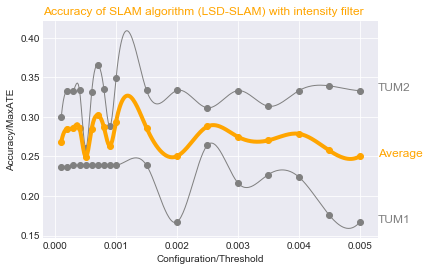

In [57]:
## For example to generate the pareto Accuracy / ExecutionTime

#'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX'], 'FPS':  (1 / x ['Summary']['algo']['Duration_Frame']['MEAN'])

mycleandata1 = [ {'config': float(re.search('TUM1XYZ-ISD-INT-(.+?).log', k).group(1)), 'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX']} for (k,x) in list(data_tum1_lsd_int.items())[:] ]
mycleandata2 = [ {'config': float(re.search('TUM2XYZ-ISD-INT-(.+?).log', k).group(1)), 'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX']} for (k,x) in list(data_tum2_lsd_int.items())[:] ]

df1 = pd.DataFrame(mycleandata1).sort_values('config')
df2 = pd.DataFrame(mycleandata2).sort_values('config')
df = df1
df=df.rename(columns = {'MaxATE':'MaxATE1'})
df['MaxATE2'] = df2['MaxATE']
df['avg'] = df[['MaxATE1', 'MaxATE2']].mean(axis=1)

x_new = np.linspace(0.0001, 0.005, 300)
a_BSpline1 = interpolate.make_interp_spline(df['config'], df['MaxATE1'])
y_new1 = a_BSpline1(x_new)
a_BSpline2 = interpolate.make_interp_spline(df['config'], df['MaxATE2'])
y_new2 = a_BSpline2(x_new)
a_BSpline3 = interpolate.make_interp_spline(df['config'], df['avg'])
y_new3 = a_BSpline3(x_new)

plt.style.use('seaborn-darkgrid')
plt.plot(x_new, y_new1, color = 'grey', linewidth=1)
plt.text(0.0053, y_new1[-1], 'TUM1', horizontalalignment='left', size='large', color='grey')
plt.scatter('config', 'MaxATE1', data=df, color='grey')

plt.plot(x_new, y_new2, color = 'grey', linewidth=1)
plt.text(0.0053, y_new2[-1], 'TUM2', horizontalalignment='left', size='large', color='grey')
plt.scatter('config', 'MaxATE2', data=df, color='grey')

plt.plot(x_new, y_new3, color = 'orange', linewidth=4)
plt.text(0.0053, y_new3[-1], 'Average', horizontalalignment='left', size='large', color='orange')
plt.scatter('config', 'avg', data=df, color='orange')

plt.title("Accuracy of SLAM algorithm (LSD-SLAM) with intensity filter", loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel("Configuration/Threshold")
plt.ylabel("Accuracy/MaxATE")


Text(0, 0.5, 'Accuracy/MaxATE')

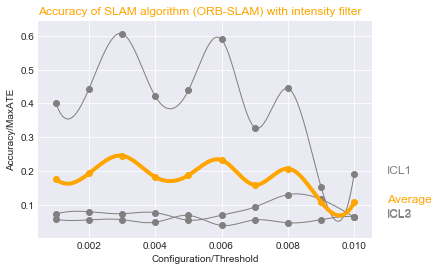

In [58]:
mycleandata1 = [ {'config': float(re.search('ICL1-ORB-INT-(.+?).log', k).group(1)), 'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX']} for (k,x) in list(data_icl1_orb_int.items())[:] ]
mycleandata2 = [ {'config': float(re.search('ICL2-ORB-INT-(.+?).log', k).group(1)), 'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX']} for (k,x) in list(data_icl2_orb_int.items())[:] ]
mycleandata3 = [ {'config': float(re.search('ICL3-ORB-INT-(.+?).log', k).group(1)), 'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX']} for (k,x) in list(data_icl3_orb_int.items())[:] ]

df1 = pd.DataFrame(mycleandata1).sort_values('config')
df2 = pd.DataFrame(mycleandata2).sort_values('config')
df3 = pd.DataFrame(mycleandata3).sort_values('config')
df = df1
df=df.rename(columns = {'MaxATE':'MaxATE1'})
df['MaxATE2'] = df2['MaxATE']
df['MaxATE3'] = df3['MaxATE']
df['avg'] = df[['MaxATE1', 'MaxATE2', 'MaxATE3']].mean(axis=1)

x_new = np.linspace(0.001, 0.01, 300)
a_BSpline1 = interpolate.make_interp_spline(df['config'], df['MaxATE1'])
y_new1 = a_BSpline1(x_new)
a_BSpline2 = interpolate.make_interp_spline(df['config'], df['MaxATE2'])
y_new2 = a_BSpline2(x_new)
a_BSpline3 = interpolate.make_interp_spline(df['config'], df['MaxATE3'])
y_new3 = a_BSpline3(x_new)
a_BSpline4 = interpolate.make_interp_spline(df['config'], df['avg'])
y_new4 = a_BSpline4(x_new)

plt.style.use('seaborn-darkgrid')
plt.plot(x_new, y_new1, color = 'grey', linewidth=1)
plt.text(0.011, y_new1[-1], 'ICL1', horizontalalignment='left', size='large', color='grey')
plt.scatter('config', 'MaxATE1', data=df, color='grey')

plt.plot(x_new, y_new2, color = 'grey', linewidth=1)
plt.text(0.011, y_new2[-1], 'ICL2', horizontalalignment='left', size='large', color='grey')
plt.scatter('config', 'MaxATE2', data=df, color='grey')

plt.plot(x_new, y_new3, color = 'grey', linewidth=1)
plt.text(0.011, y_new3[-1], 'ICL3', horizontalalignment='left', size='large', color='grey')
plt.scatter('config', 'MaxATE3', data=df, color='grey')

plt.plot(x_new, y_new4, color = 'orange', linewidth=4)
plt.text(0.011, y_new4[-1], 'Average', horizontalalignment='left', size='large', color='orange')
plt.scatter('config', 'avg', data=df, color='orange')

plt.title("Accuracy of SLAM algorithm (ORB-SLAM) with intensity filter", loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel("Configuration/Threshold")
plt.ylabel("Accuracy/MaxATE")


Text(0, 0.5, 'Accuracy/MaxATE')

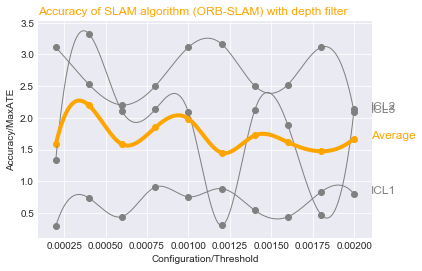

In [59]:
mycleandata1 = [ {'config': float(re.search('ICL1-DEP-INT-(.+?).log', k).group(1)), 'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX']} for (k,x) in list(data_icl1_orb_dep.items())[:] ]
mycleandata2 = [ {'config': float(re.search('ICL2-DEP-INT-(.+?).log', k).group(1)), 'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX']} for (k,x) in list(data_icl2_orb_dep.items())[:] ]
mycleandata3 = [ {'config': float(re.search('ICL3-DEP-INT-(.+?).log', k).group(1)), 'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX']} for (k,x) in list(data_icl3_orb_dep.items())[:] ]

df1 = pd.DataFrame(mycleandata1).sort_values('config')
df2 = pd.DataFrame(mycleandata2).sort_values('config')
df3 = pd.DataFrame(mycleandata3).sort_values('config')
df = df1
df=df.rename(columns = {'MaxATE':'MaxATE1'})
df['MaxATE2'] = df2['MaxATE']
df['MaxATE3'] = df3['MaxATE']
df['avg'] = df[['MaxATE1', 'MaxATE2', 'MaxATE3']].mean(axis=1)

x_new = np.linspace(0.0002, 0.002, 300)
a_BSpline1 = interpolate.make_interp_spline(df['config'], df['MaxATE1'])
y_new1 = a_BSpline1(x_new)
a_BSpline2 = interpolate.make_interp_spline(df['config'], df['MaxATE2'])
y_new2 = a_BSpline2(x_new)
a_BSpline3 = interpolate.make_interp_spline(df['config'], df['MaxATE3'])
y_new3 = a_BSpline3(x_new)
a_BSpline4 = interpolate.make_interp_spline(df['config'], df['avg'])
y_new4 = a_BSpline4(x_new)

plt.style.use('seaborn-darkgrid')
plt.plot(x_new, y_new1, color = 'grey', linewidth=1)
plt.text(0.0021, y_new1[-1], 'ICL1', horizontalalignment='left', size='large', color='grey')
plt.scatter('config', 'MaxATE1', data=df, color='grey')

plt.plot(x_new, y_new2, color = 'grey', linewidth=1)
plt.text(0.0021, y_new2[-1], 'ICL2', horizontalalignment='left', size='large', color='grey')
plt.scatter('config', 'MaxATE2', data=df, color='grey')

plt.plot(x_new, y_new3, color = 'grey', linewidth=1)
plt.text(0.0021, y_new3[-1], 'ICL3', horizontalalignment='left', size='large', color='grey')
plt.scatter('config', 'MaxATE3', data=df, color='grey')

plt.plot(x_new, y_new4, color = 'orange', linewidth=4)
plt.text(0.0021, y_new4[-1], 'Average', horizontalalignment='left', size='large', color='orange')
plt.scatter('config', 'avg', data=df, color='orange')

plt.title("Accuracy of SLAM algorithm (ORB-SLAM) with depth filter", loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel("Configuration/Threshold")
plt.ylabel("Accuracy/MaxATE")

Text(0, 0.5, 'Accuracy/MaxATE')

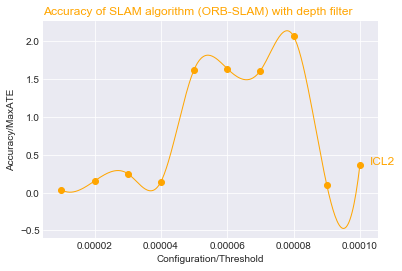

In [69]:
mycleandata1 = [ {'config': float(re.search('ICL2-ORB-DEP-(.+?).log', k).group(1)), 'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX']} for (k,x) in list(data_icl2_orb_dep_2.items())[:] ]

df = pd.DataFrame(mycleandata1).sort_values('config')

x_new = np.linspace(0.00001, 0.0001, 300)
a_BSpline = interpolate.make_interp_spline(df['config'], df['MaxATE'])
y_new = a_BSpline(x_new)

plt.style.use('seaborn-darkgrid')
plt.plot(x_new, y_new, color = 'orange', linewidth=1)
plt.text(0.000103, y_new[-1], 'ICL2', horizontalalignment='left', size='large', color='orange')
plt.scatter('config', 'MaxATE', data=df, color='orange')

plt.title("Accuracy of SLAM algorithm (ORB-SLAM) with depth filter", loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel("Configuration/Threshold")
plt.ylabel("Accuracy/MaxATE")

Text(0, 0.5, 'Accuracy/MaxATE')

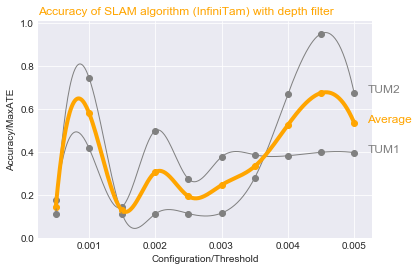

In [85]:
mycleandata1 = [ {'config': float(re.search('TUM1XYZ-INF-DEP-(.+?).log', k).group(1)), 'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX']} for (k,x) in list(data_tum1_inf_dep.items())[:] ]
mycleandata2 = [ {'config': float(re.search('TUM2XYZ-INF-DEP-(.+?).log', k).group(1)), 'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX']} for (k,x) in list(data_tum2_inf_dep.items())[:] ]

df1 = pd.DataFrame(mycleandata1).sort_values('config')
df2 = pd.DataFrame(mycleandata2).sort_values('config')
df = df1
df=df.rename(columns = {'MaxATE':'MaxATE1'})
df['MaxATE2'] = df2['MaxATE']
df['avg'] = df[['MaxATE1', 'MaxATE2']].mean(axis=1)

x_new = np.linspace(0.0005, 0.005, 300)
a_BSpline1 = interpolate.make_interp_spline(df['config'], df['MaxATE1'])
y_new1 = a_BSpline1(x_new)
a_BSpline2 = interpolate.make_interp_spline(df['config'], df['MaxATE2'])
y_new2 = a_BSpline2(x_new)
a_BSpline4 = interpolate.make_interp_spline(df['config'], df['avg'])
y_new4 = a_BSpline4(x_new)

plt.style.use('seaborn-darkgrid')
plt.plot(x_new, y_new1, color = 'grey', linewidth=1)
plt.text(0.0052, y_new1[-1], 'TUM1', horizontalalignment='left', size='large', color='grey')
plt.scatter('config', 'MaxATE1', data=df, color='grey')

plt.plot(x_new, y_new2, color = 'grey', linewidth=1)
plt.text(0.0052, y_new2[-1], 'TUM2', horizontalalignment='left', size='large', color='grey')
plt.scatter('config', 'MaxATE2', data=df, color='grey')

plt.plot(x_new, y_new4, color = 'orange', linewidth=4)
plt.text(0.0052, y_new4[-1], 'Average', horizontalalignment='left', size='large', color='orange')
plt.scatter('config', 'avg', data=df, color='orange')

plt.title("Accuracy of SLAM algorithm (InfiniTam) with depth filter", loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel("Configuration/Threshold")
plt.ylabel("Accuracy/MaxATE")

Text(0, 0.5, 'Accuracy/MaxATE')

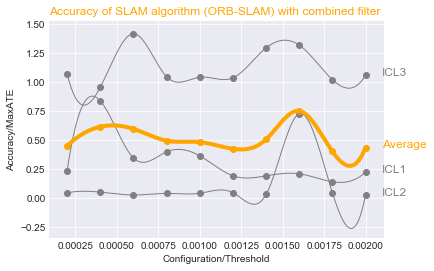

In [87]:
mycleandata1 = [ {'config': float(re.search('ICL1-ORB-COM-(.+?).log', k).group(1)), 'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX']} for (k,x) in list(data_icl1_orb_com.items())[:] ]
mycleandata2 = [ {'config': float(re.search('ICL2-ORB-COM-(.+?).log', k).group(1)), 'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX']} for (k,x) in list(data_icl2_orb_com.items())[:] ]
mycleandata3 = [ {'config': float(re.search('ICL3-ORB-COM-(.+?).log', k).group(1)), 'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX']} for (k,x) in list(data_icl3_orb_com.items())[:] ]

df1 = pd.DataFrame(mycleandata1).sort_values('config')
df2 = pd.DataFrame(mycleandata2).sort_values('config')
df3 = pd.DataFrame(mycleandata3).sort_values('config')
df = df1
df=df.rename(columns = {'MaxATE':'MaxATE1'})
df['MaxATE2'] = df2['MaxATE']
df['MaxATE3'] = df3['MaxATE']
df['avg'] = df[['MaxATE1', 'MaxATE2', 'MaxATE3']].mean(axis=1)

x_new = np.linspace(0.0002, 0.002, 300)
a_BSpline1 = interpolate.make_interp_spline(df['config'], df['MaxATE1'])
y_new1 = a_BSpline1(x_new)
a_BSpline2 = interpolate.make_interp_spline(df['config'], df['MaxATE2'])
y_new2 = a_BSpline2(x_new)
a_BSpline3 = interpolate.make_interp_spline(df['config'], df['MaxATE3'])
y_new3 = a_BSpline3(x_new)
a_BSpline4 = interpolate.make_interp_spline(df['config'], df['avg'])
y_new4 = a_BSpline4(x_new)

plt.style.use('seaborn-darkgrid')
plt.plot(x_new, y_new1, color = 'grey', linewidth=1)
plt.text(0.0021, y_new1[-1], 'ICL1', horizontalalignment='left', size='large', color='grey')
plt.scatter('config', 'MaxATE1', data=df, color='grey')

plt.plot(x_new, y_new2, color = 'grey', linewidth=1)
plt.text(0.0021, y_new2[-1], 'ICL2', horizontalalignment='left', size='large', color='grey')
plt.scatter('config', 'MaxATE2', data=df, color='grey')

plt.plot(x_new, y_new3, color = 'grey', linewidth=1)
plt.text(0.0021, y_new3[-1], 'ICL3', horizontalalignment='left', size='large', color='grey')
plt.scatter('config', 'MaxATE3', data=df, color='grey')

plt.plot(x_new, y_new4, color = 'orange', linewidth=4)
plt.text(0.0021, y_new4[-1], 'Average', horizontalalignment='left', size='large', color='orange')
plt.scatter('config', 'avg', data=df, color='orange')

plt.title("Accuracy of SLAM algorithm (ORB-SLAM) with combined filter", loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel("Configuration/Threshold")
plt.ylabel("Accuracy/MaxATE")

Text(0, 0.5, 'Accuracy/MaxATE')

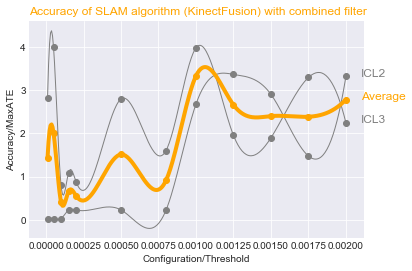

In [94]:
mycleandata2 = [ {'config': float(re.search('ICL2-KF-COM-(.+?).log', k).group(1)), 'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX']} for (k,x) in list(data_icl2_kf_com.items())[:] ]
mycleandata3 = [ {'config': float(re.search('ICL3-KF-COM-(.+?).log', k).group(1)), 'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX']} for (k,x) in list(data_icl3_kf_com.items())[:] ]


df2 = pd.DataFrame(mycleandata2).sort_values('config')
df3 = pd.DataFrame(mycleandata3).sort_values('config')
df = df2
df=df.rename(columns = {'MaxATE':'MaxATE2'})
df['MaxATE3'] = df3['MaxATE']
df['avg'] = df[['MaxATE2', 'MaxATE3']].mean(axis=1)

x_new = np.linspace(0.00001, 0.002, 300)
a_BSpline2 = interpolate.make_interp_spline(df['config'], df['MaxATE2'])
y_new2 = a_BSpline2(x_new)
a_BSpline3 = interpolate.make_interp_spline(df['config'], df['MaxATE3'])
y_new3 = a_BSpline3(x_new)
a_BSpline4 = interpolate.make_interp_spline(df['config'], df['avg'])
y_new4 = a_BSpline4(x_new)

plt.style.use('seaborn-darkgrid')

plt.plot(x_new, y_new2, color = 'grey', linewidth=1)
plt.text(0.0021, y_new2[-1], 'ICL2', horizontalalignment='left', size='large', color='grey')
plt.scatter('config', 'MaxATE2', data=df, color='grey')

plt.plot(x_new, y_new3, color = 'grey', linewidth=1)
plt.text(0.0021, y_new3[-1], 'ICL3', horizontalalignment='left', size='large', color='grey')
plt.scatter('config', 'MaxATE3', data=df, color='grey')

plt.plot(x_new, y_new4, color = 'orange', linewidth=4)
plt.text(0.0021, y_new4[-1], 'Average', horizontalalignment='left', size='large', color='orange')
plt.scatter('config', 'avg', data=df, color='orange')

plt.title("Accuracy of SLAM algorithm (KinectFusion) with combined filter", loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel("Configuration/Threshold")
plt.ylabel("Accuracy/MaxATE")

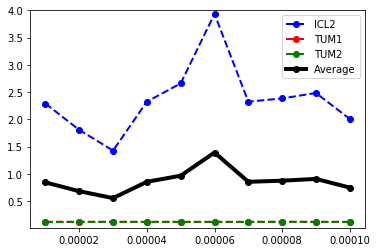

In [12]:
mycleandata1 = [ {'x': float(re.search('ICL2-INF-DEP-(.+?).log', k).group(1)), 'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX']} for (k,x) in list(data_icl2_inf_dep.items())[:] ]
mycleandata2 = [ {'x': float(re.search('TUM1XYZ-INF-DEP-(.+?).log', k).group(1)), 'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX']} for (k,x) in list(data_tum1_inf_dep.items())[:] ]
mycleandata3 = [ {'x': float(re.search('TUM2XYZ-INF-DEP-(.+?).log', k).group(1)), 'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX']} for (k,x) in list(data_tum2_inf_dep.items())[:] ]

df1 = pd.DataFrame(mycleandata1).sort_values('x')
df2 = pd.DataFrame(mycleandata2).sort_values('x')
df3 = pd.DataFrame(mycleandata3).sort_values('x')
df = df1
df=df.rename(columns = {'MaxATE':'MaxATE1'})
df['MaxATE2'] = df2['MaxATE']
df['MaxATE3'] = df3['MaxATE']
df['avg'] = df[['MaxATE1', 'MaxATE2', 'MaxATE3']].mean(axis=1)
infdf['avgdep']=df['avg']

plt.plot( 'x', 'MaxATE1', data=df, marker='o', color='blue', linestyle='dashed', linewidth=2, label="ICL2")
plt.plot( 'x', 'MaxATE2', data=df, marker='o', color='red', linestyle='dashed', linewidth=2, label="TUM1")
plt.plot( 'x', 'MaxATE3', data=df, marker='o', color='green', linewidth=2, linestyle='dashed', label="TUM2")
plt.plot( 'x', 'avg', data=df, marker='o', color='black', linewidth=4, label="Average")
plt.ylim(0.01, 4)
plt.legend()

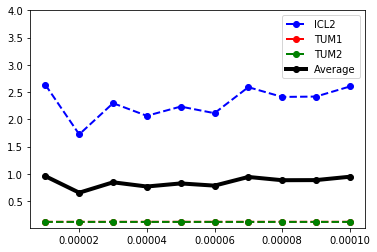

In [13]:
mycleandata1 = [ {'x': float(re.search('ICL2-INF-COM-(.+?).log', k).group(1)), 'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX']} for (k,x) in list(data_icl2_inf_com.items())[:] ]
mycleandata2 = [ {'x': float(re.search('TUM1XYZ-INF-COM-(.+?).log', k).group(1)), 'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX']} for (k,x) in list(data_tum1_inf_com.items())[:] ]
mycleandata3 = [ {'x': float(re.search('TUM2XYZ-INF-COM-(.+?).log', k).group(1)), 'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX']} for (k,x) in list(data_tum2_inf_com.items())[:] ]

df1 = pd.DataFrame(mycleandata1).sort_values('x')
df2 = pd.DataFrame(mycleandata2).sort_values('x')
df3 = pd.DataFrame(mycleandata3).sort_values('x')
df = df1
df=df.rename(columns = {'MaxATE':'MaxATE1'})
df['MaxATE2'] = df2['MaxATE']
df['MaxATE3'] = df3['MaxATE']
df['avg'] = df[['MaxATE1', 'MaxATE2', 'MaxATE3']].mean(axis=1)
infdf['avgcom']=df['avg']

plt.plot( 'x', 'MaxATE1', data=df, marker='o', color='blue', linestyle='dashed', linewidth=2, label="ICL2")
plt.plot( 'x', 'MaxATE2', data=df, marker='o', color='red', linestyle='dashed', linewidth=2, label="TUM1")
plt.plot( 'x', 'MaxATE3', data=df, marker='o', color='green', linewidth=2, linestyle='dashed', label="TUM2")
plt.plot( 'x', 'avg', data=df, marker='o', color='black', linewidth=4, label="Average")
plt.ylim(0.01, 4)
plt.legend()

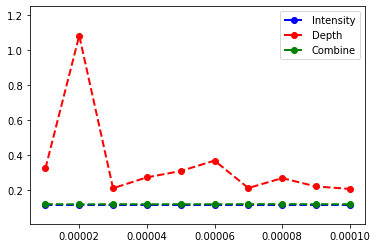

In [17]:
plt.plot( 'config', 'avgint', data=kfdf, marker='o', color='blue', linestyle='dashed', linewidth=2, label="Intensity")
plt.plot( 'config', 'avgdep', data=kfdf, marker='o', color='red', linestyle='dashed', linewidth=2, label="Depth")
plt.plot( 'config', 'avgcom', data=kfdf, marker='o', color='green', linewidth=2, linestyle='dashed', label="Combine")
plt.ylim(0.01, 1.25)
plt.legend()

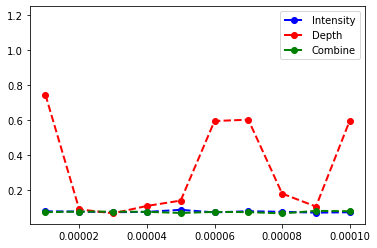

In [18]:
plt.plot( 'config', 'avgint', data=orbdf, marker='o', color='blue', linestyle='dashed', linewidth=2, label="Intensity")
plt.plot( 'config', 'avgdep', data=orbdf, marker='o', color='red', linestyle='dashed', linewidth=2, label="Depth")
plt.plot( 'config', 'avgcom', data=orbdf, marker='o', color='green', linewidth=2, linestyle='dashed', label="Combine")
plt.ylim(0.01, 1.25)
plt.legend()

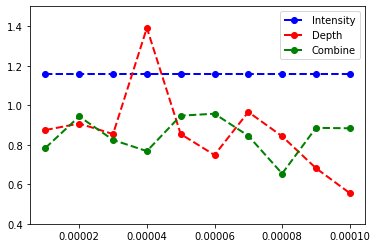

In [20]:
plt.plot( 'config', 'avgint', data=infdf, marker='o', color='blue', linestyle='dashed', linewidth=2, label="Intensity")
plt.plot( 'config', 'avgdep', data=infdf, marker='o', color='red', linestyle='dashed', linewidth=2, label="Depth")
plt.plot( 'config', 'avgcom', data=infdf, marker='o', color='green', linewidth=2, linestyle='dashed', label="Combine")
plt.ylim(0.4, 1.5)
plt.legend()